In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
airline= pd.read_csv('./data/Airline_Delay_Cause.csv')
airline.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",92.0,17.0,4.80,1.24,...,0.0,6.67,4.0,2.0,1834.0,517.0,555.0,283.0,0.0,479.0
1,2025,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",92.0,24.0,10.74,3.65,...,0.0,5.03,2.0,1.0,2080.0,615.0,917.0,186.0,0.0,362.0
2,2025,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",188.0,52.0,17.87,1.49,...,0.0,19.67,4.0,1.0,4132.0,956.0,538.0,898.0,0.0,1740.0
3,2025,5,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",83.0,26.0,6.01,0.00,...,0.0,17.11,4.0,0.0,1975.0,857.0,0.0,83.0,0.0,1035.0
4,2025,5,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3118.0,785.0,146.76,26.61,...,0.0,411.36,43.0,8.0,67705.0,19313.0,3384.0,10047.0,0.0,34961.0


In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1869 non-null   int64  
 1   month                1869 non-null   int64  
 2   carrier              1869 non-null   object 
 3   carrier_name         1869 non-null   object 
 4   airport              1869 non-null   object 
 5   airport_name         1869 non-null   object 
 6   arr_flights          1869 non-null   float64
 7   arr_del15            1868 non-null   float64
 8   carrier_ct           1869 non-null   float64
 9   weather_ct           1869 non-null   float64
 10  nas_ct               1869 non-null   float64
 11  security_ct          1869 non-null   float64
 12  late_aircraft_ct     1869 non-null   float64
 13  arr_cancelled        1869 non-null   float64
 14  arr_diverted         1869 non-null   float64
 15  arr_delay            1869 non-null   f

In [11]:
airline.shape

(1869, 21)

In [12]:
airline.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1869.0,1869.0,1869.000000,1868.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,2025.0,5.0,357.188871,83.116702,23.120423,3.860936,26.631953,0.108839,29.349930,4.039058,1.015516,6120.090423,1768.024612,435.370251,1549.852862,6.233280,2360.609417
std,0.0,0.0,1027.337133,237.684657,58.894881,14.084989,93.909222,0.501241,90.110594,16.005924,4.482929,19397.847282,5589.528790,1657.098486,6943.171553,35.612342,7351.852463
min,2025.0,5.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025.0,5.0,52.000000,10.000000,2.980000,0.000000,1.730000,0.000000,2.590000,0.000000,0.000000,564.000000,158.000000,0.000000,73.000000,0.000000,157.000000
50%,2025.0,5.0,94.000000,23.000000,6.920000,1.000000,5.710000,0.000000,7.550000,1.000000,0.000000,1579.000000,450.000000,72.000000,244.000000,0.000000,561.000000
75%,2025.0,5.0,243.000000,60.000000,19.070000,3.040000,15.380000,0.000000,20.290000,3.000000,1.000000,4161.000000,1285.000000,314.000000,711.000000,0.000000,1647.000000
max,2025.0,5.0,20718.000000,4122.000000,1005.310000,343.380000,1607.800000,11.290000,1867.510000,400.000000,94.000000,380410.000000,110579.000000,38250.000000,182823.000000,778.000000,160078.000000


In [13]:
airline.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              1
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

1. Histograms

Shows the distribution of each numeric column. Helps see skewness and most common values.

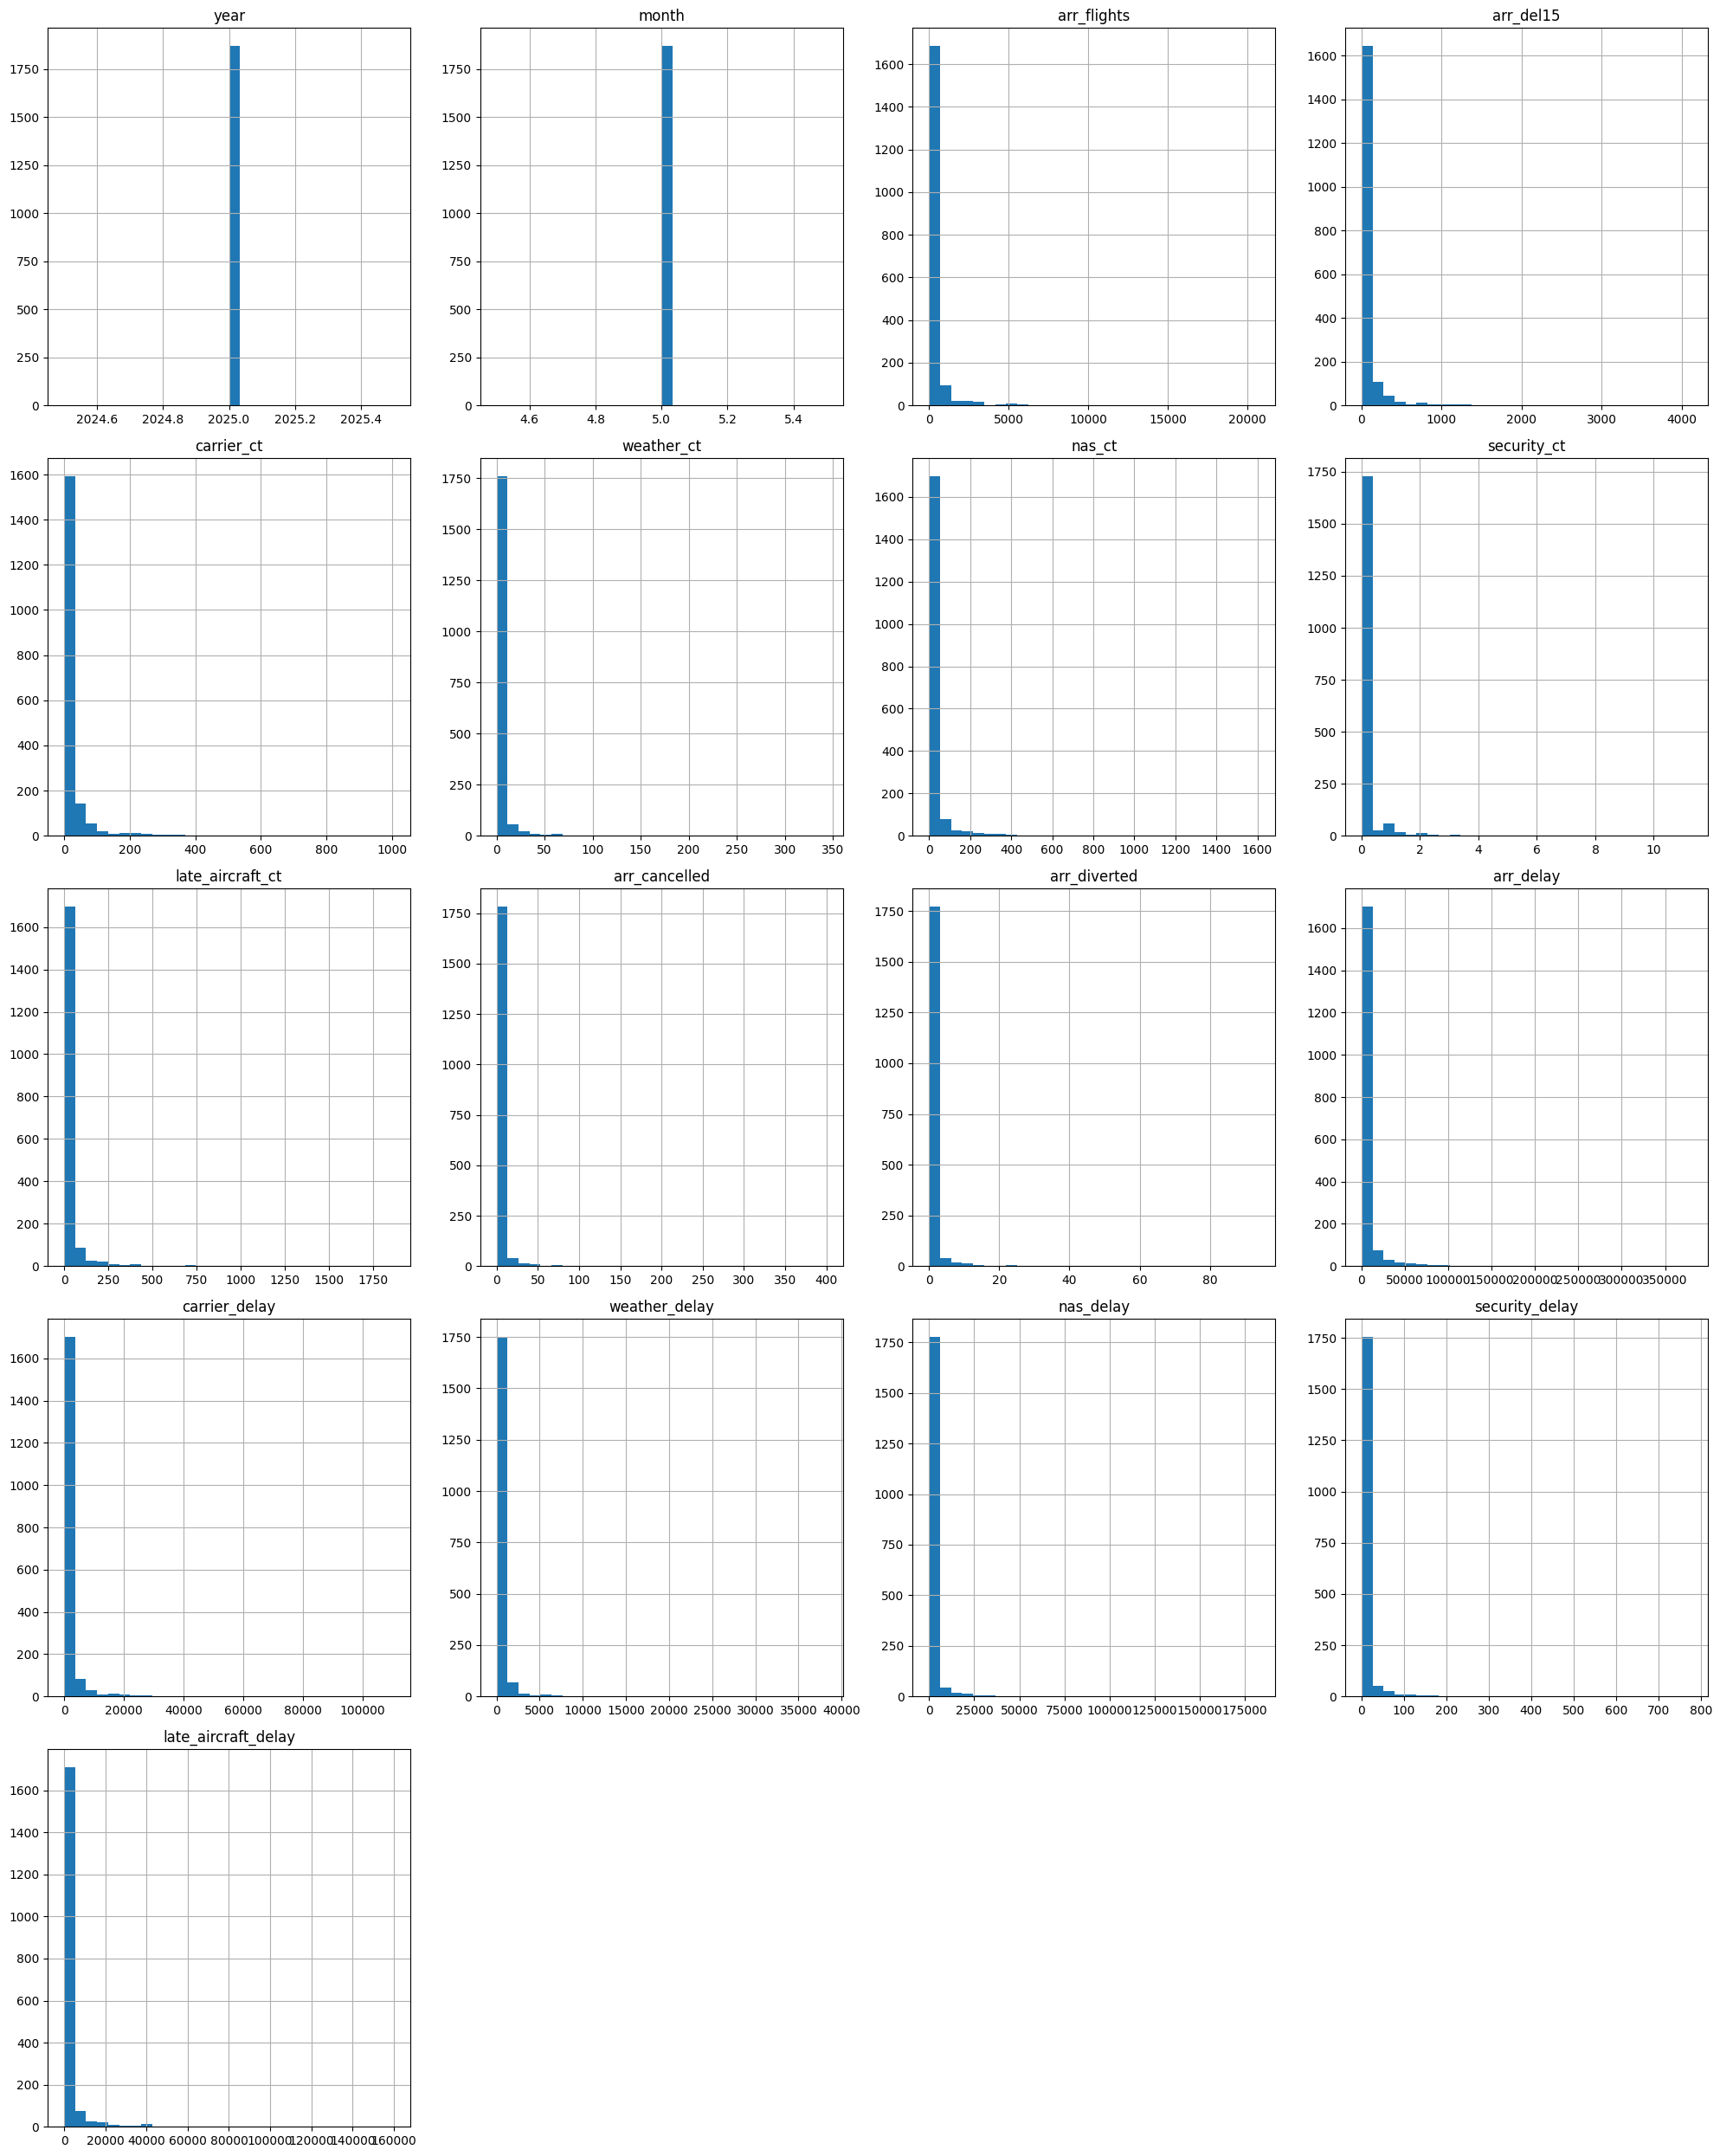

In [14]:


numeric_columns=airline.select_dtypes(include='number').columns
airline[numeric_columns].hist(bins=30, figsize=(20,25))
plt.tight_layout()
plt.show()

In [15]:
airline.isnull().mean() * 100


year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.000000
arr_del15              0.053505
carrier_ct             0.000000
weather_ct             0.000000
nas_ct                 0.000000
security_ct            0.000000
late_aircraft_ct       0.000000
arr_cancelled          0.000000
arr_diverted           0.000000
arr_delay              0.000000
carrier_delay          0.000000
weather_delay          0.000000
nas_delay              0.000000
security_delay         0.000000
late_aircraft_delay    0.000000
dtype: float64

In [16]:

from sklearn.preprocessing import PowerTransformer, StandardScaler


skewed_cols= ['arr_delay','carrier_delay','weather_delay',
               'nas_delay','security_delay','late_aircraft_delay']

pt= PowerTransformer(method='yeo-johnson')
airline[skewed_cols]=pt.fit_transform(airline[skewed_cols])
scalar= StandardScaler()
airline[skewed_cols]=scalar.fit_transform(airline[skewed_cols])


In [17]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1869 non-null   int64  
 1   month                1869 non-null   int64  
 2   carrier              1869 non-null   object 
 3   carrier_name         1869 non-null   object 
 4   airport              1869 non-null   object 
 5   airport_name         1869 non-null   object 
 6   arr_flights          1869 non-null   float64
 7   arr_del15            1868 non-null   float64
 8   carrier_ct           1869 non-null   float64
 9   weather_ct           1869 non-null   float64
 10  nas_ct               1869 non-null   float64
 11  security_ct          1869 non-null   float64
 12  late_aircraft_ct     1869 non-null   float64
 13  arr_cancelled        1869 non-null   float64
 14  arr_diverted         1869 non-null   float64
 15  arr_delay            1869 non-null   f

In [18]:
airline.shape

(1869, 21)

In [19]:
airline.nunique()

year                      1
month                     1
carrier                  20
carrier_name             20
airport                 357
airport_name            357
arr_flights             613
arr_del15               299
carrier_ct             1264
weather_ct              633
nas_ct                 1214
security_ct             115
late_aircraft_ct       1296
arr_cancelled            60
arr_diverted             33
arr_delay              1544
carrier_delay          1174
weather_delay           677
nas_delay               952
security_delay          101
late_aircraft_delay    1215
dtype: int64

In [20]:
airline.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              1
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [21]:
# airline['arr_del15'].head()
# airline['arr_del15'].isnull().sum()

airline= airline.dropna(subset=['arr_del15'])

In [22]:
airline.shape

(1868, 21)

In [23]:
airline.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1868.0,1868.0,1868.000000,1868.000000,1868.00000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,2025.0,5.0,357.379550,83.116702,23.13280,3.863003,26.646210,0.108897,29.365642,4.040685,1.016060,0.001455,0.001211,0.000678,0.001120,0.000180,0.001031
std,0.0,0.0,1027.579144,237.684657,58.90822,14.088477,93.932345,0.501369,90.132163,16.010055,4.484068,0.998555,0.999163,1.000106,0.999362,1.000505,0.999541
min,2025.0,5.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.717958,-2.263056,-1.266775,-2.093085,-0.336309,-1.926212
25%,2025.0,5.0,52.000000,10.000000,2.99500,0.000000,1.737500,0.000000,2.605000,0.000000,0.000000,-0.552535,-0.525223,-1.266775,-0.513523,-0.336309,-0.507984
50%,2025.0,5.0,94.000000,23.000000,6.93000,1.000000,5.725000,0.000000,7.555000,1.000000,0.000000,-0.025328,-0.014686,0.216783,0.020817,-0.336309,0.032218
75%,2025.0,5.0,243.250000,60.000000,19.07750,3.040000,15.400000,0.000000,20.305000,3.000000,1.000000,0.532207,0.566614,0.780145,0.538549,-0.336309,0.568691
max,2025.0,5.0,20718.000000,4122.000000,1005.31000,343.380000,1607.800000,11.290000,1867.510000,400.000000,94.000000,4.141611,4.058036,2.859848,3.976412,2.988738,3.993506


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py:2037: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


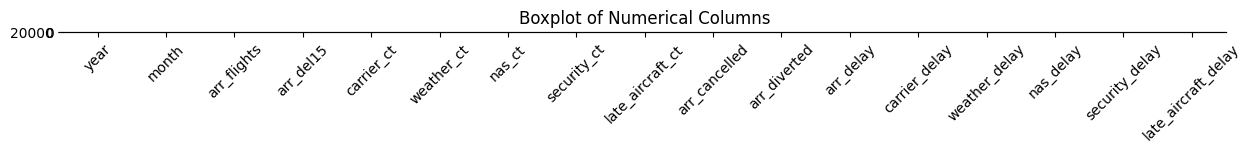

In [24]:
import matplotlib.pyplot as plt

airline.boxplot(figsize=(15,0))
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.grid()
plt.show()

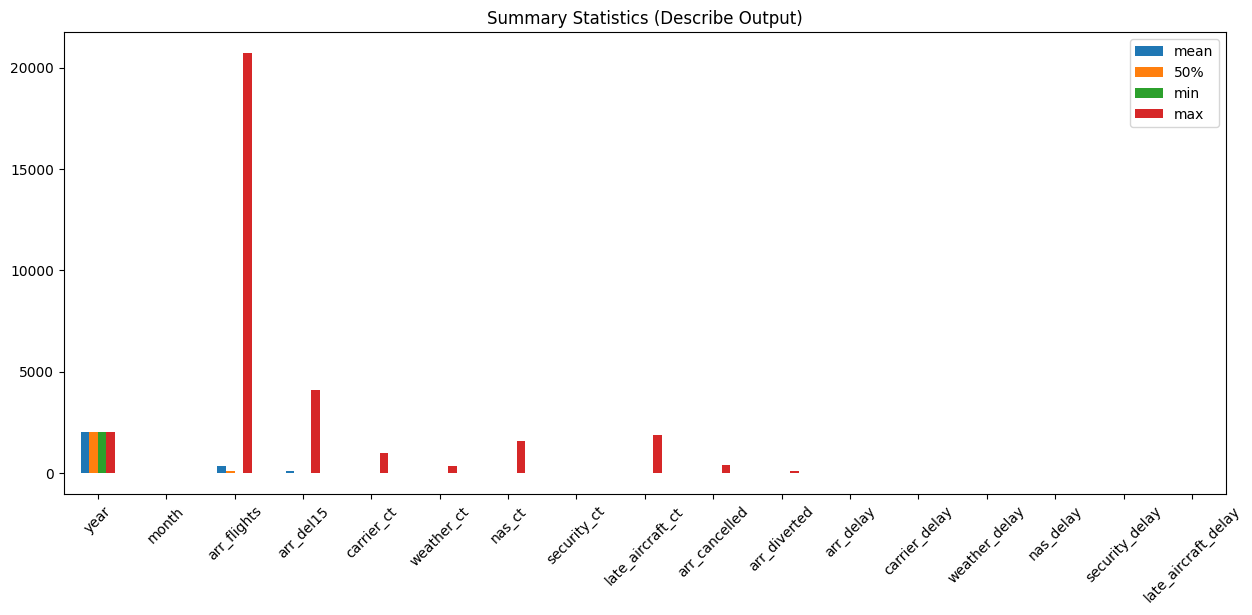

In [25]:
# Bar chart of summary stats
desc= airline.describe().T
desc[['mean','50%','min','max']].plot(kind='bar', figsize=(15,6))
plt.title("Summary Statistics (Describe Output)")
plt.xticks(rotation=45)
plt.show()


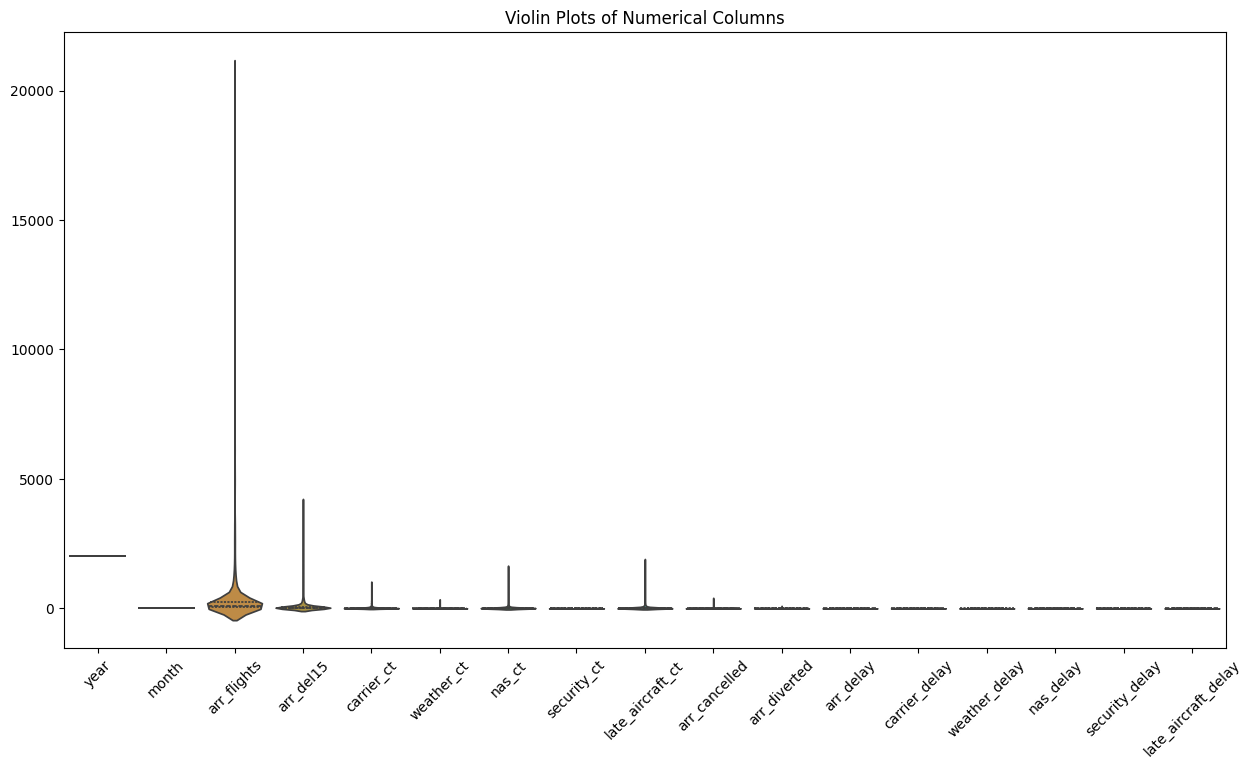

In [26]:
# Shows full distribution + boxplot in one.

import seaborn as sns

plt.figure(figsize=(15,8))
sns.violinplot(data=airline, inner='quartile')
plt.xticks(rotation=45)
plt.title("Violin Plots of Numerical Columns")
plt.show()


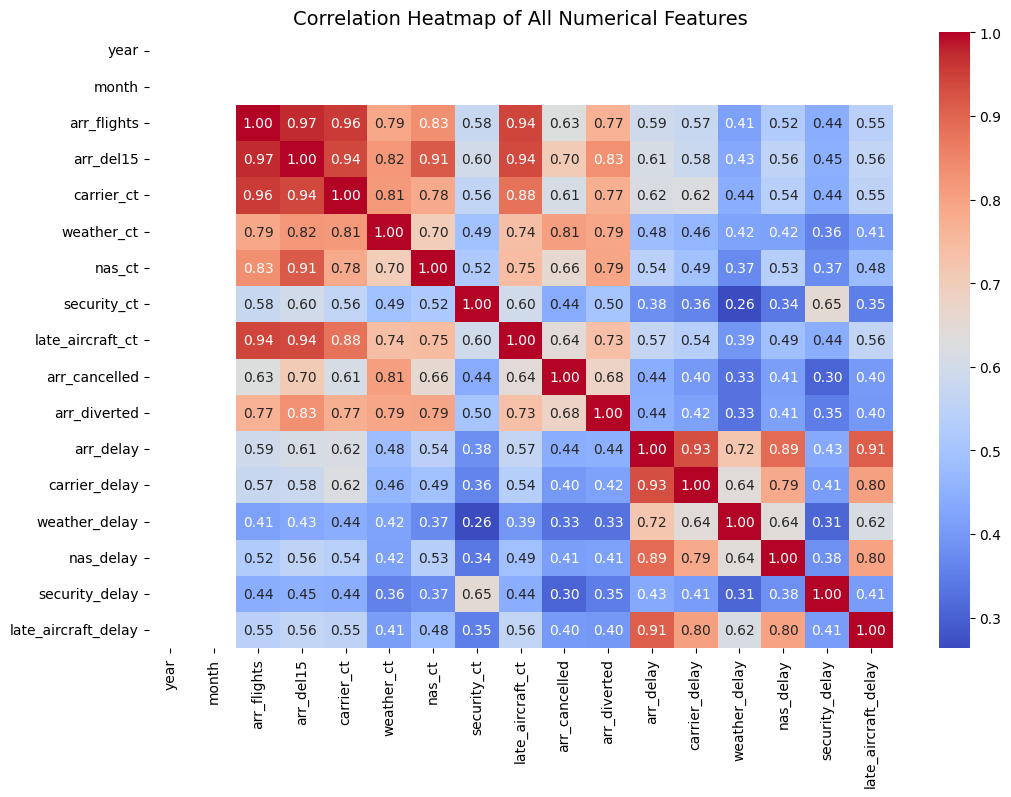

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (only for numeric columns)
numeric_cols = airline.select_dtypes(include=['int64','float64'])
corr = numeric_cols.corr()

# Set up the figure
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of All Numerical Features", fontsize=14)
plt.show()


In [28]:
import numpy as np

numeric_cols = airline.select_dtypes(include=['int64','float64'])
corr = numeric_cols.corr()

upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

high_corr_features=[column for column in upper.columns if any(upper[column]>0.9)]

high_corr_features

['arr_del15',
 'carrier_ct',
 'nas_ct',
 'late_aircraft_ct',
 'carrier_delay',
 'late_aircraft_delay']

In [29]:
# Drop them from dataset

airline_reduced= airline.drop(columns=high_corr_features)

airline_reduced

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,weather_ct,security_ct,arr_cancelled,arr_diverted,arr_delay,weather_delay,nas_delay,security_delay
0,2025,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",92.0,1.24,0.0,4.0,2.0,0.056555,1.006685,0.090020,-0.336309
1,2025,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",92.0,3.65,0.0,2.0,1.0,0.126659,1.211226,-0.103842,-0.336309
2,2025,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",188.0,1.49,0.0,4.0,1.0,0.527554,0.994144,0.656075,-0.336309
3,2025,5,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",83.0,0.00,0.0,4.0,0.0,0.097684,-1.266775,-0.459120,-0.336309
4,2025,5,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3118.0,26.61,0.0,43.0,8.0,2.535102,1.761942,2.006835,-0.336309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,2025,5,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",197.0,0.00,0.0,12.0,0.0,0.123955,-1.266775,0.403486,-0.336309
1865,2025,5,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",74.0,0.00,0.0,11.0,0.0,-0.536544,-1.266775,-0.914443,-0.336309
1866,2025,5,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",97.0,1.00,0.0,4.0,1.0,0.138682,0.490100,0.418696,-0.336309
1867,2025,5,YX,Republic Airline,TYS,"Knoxville, TN: McGhee Tyson",82.0,0.00,0.0,3.0,0.0,-0.151581,-1.266775,0.300635,-0.336309


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import sparse as sps

X= airline_reduced.drop(columns=['arr_delay'])
y=airline_reduced['arr_delay']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns


processor= ColumnTransformer(transformers=[('num',MinMaxScaler(),num_cols),
                                           ('cat', OneHotEncoder(handle_unknown='ignore'),cat_cols)],remainder='drop')



X_train_prep= processor.fit_transform(X_train)
x_val_prep=processor.transform(X_val)

# print(x_val_prep.shape)

In [255]:
print(X_train_prep.shape, x_val_prep.shape)


(1494, 704) (374, 704)


In [169]:
n_features=X_train[num_cols].shape[1]
from tensorflow.keras import Input, layers

tf.random.set_seed(42)
n_features = X_train_prep.shape[1]

n_features


model = tf.keras.Sequential([
    Input(shape=(n_features,)),
    layers.Dense(60, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mae'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

history_1 = model.fit(X_train_prep, y_train, 
                    validation_split=0.2,
                    epochs=60, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1282 - mae: 0.1282 - val_loss: 0.3571 - val_mae: 0.3571
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1260 - mae: 0.1260 - val_loss: 0.3556 - val_mae: 0.3556
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1241 - mae: 0.1241 - val_loss: 0.3544 - val_mae: 0.3544
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1211 - mae: 0.1211 - val_loss: 0.3530 - val_mae: 0.3530
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1198 - mae: 0.1198 - val_loss: 0.3524 - val_mae: 0.3524
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1185 - mae: 0.1185 - val_loss: 0.3519 - val_mae: 0.3519
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1207 - mae: 0.1207 - val_loss: 0.3485 - val_mae: 0.3485
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1214 - mae: 0.1214 - val_loss: 0.3491 - val_mae: 0.3491
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.121

In [118]:
def plot_history(history,metrics=['loss','mae']):
    
    """
    Ploting the (and validation if available) curves from keras history object

    Parameters
    history : keras.callbacks.History
    The History object returned by model.fit().
    metrics : list of str
    Which metrics to plot (default ['loss', 'mae']).
    """
    history_df=pd.DataFrame(history.history)
    for metric in metrics:
        plt.Figure(figsize=(10,7))
        plt.plot(history_df[metric], label=f"Train {metric}")
        if f"val_{metric}" in history_df:
            plt.plot(history_df[f"val_{metric}"], label=f"val_{metric}")
        plt.title(f"Training vs validation metrics of {metric}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show() 



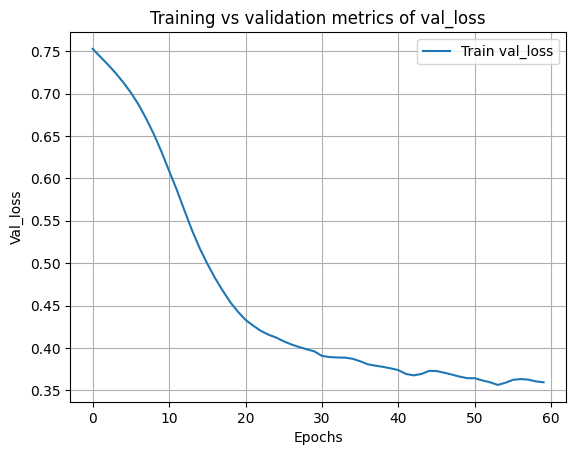

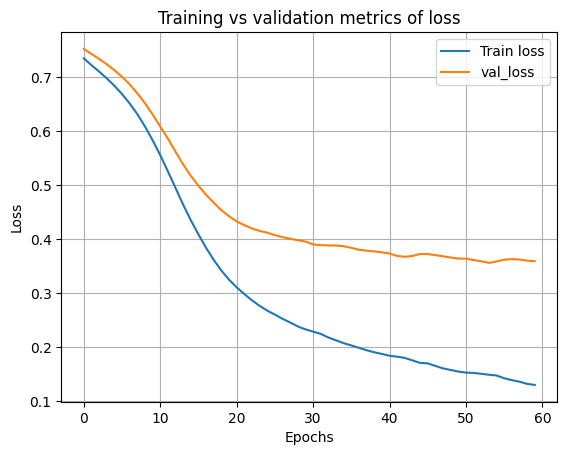

In [174]:
history_1.history.keys()

history_1.history['val_loss']

plot_history(history=history_1,metrics=['val_loss','loss'])


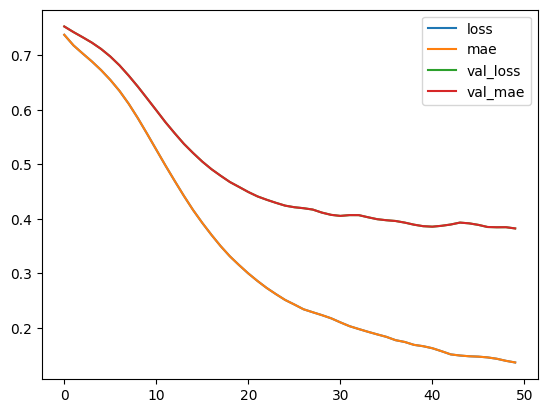

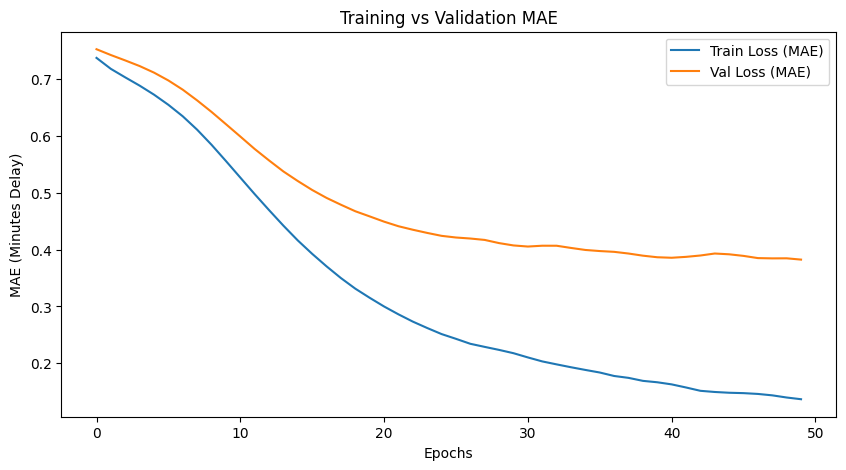

In [124]:
pd.DataFrame(history_1.history).plot()
plt.figure(figsize=(10,5))
plt.plot(history_1.history["loss"], label="Train Loss (MAE)")
plt.plot(history_1.history["val_loss"], label="Val Loss (MAE)")
plt.xlabel("Epochs")
plt.ylabel("MAE (Minutes Delay)")
plt.title("Training vs Validation MAE")
plt.legend()
plt.show()

In [120]:
x_val_prep.shape

(374, 704)

In [175]:
model.evaluate(x_val_prep,y_val)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3534 - mae: 0.3534 


[0.35341545939445496, 0.35341545939445496]

In [205]:
# our model is overfitting so to avoid overfitting we will use the techniques likes early stopping, regularization,

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_2 = model.fit(X_train_prep, y_train, 
                    validation_split=0.2, 
                    epochs=60, 
                    callbacks=[early_stop])

Epoch 1/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0275 - mae: 0.0275 - val_loss: 0.3378 - val_mae: 0.3378
Epoch 2/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mae: 0.0269 - val_loss: 0.3381 - val_mae: 0.3381
Epoch 3/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mae: 0.0259 - val_loss: 0.3395 - val_mae: 0.3395
Epoch 4/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mae: 0.0254 - val_loss: 0.3404 - val_mae: 0.3404
Epoch 5/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mae: 0.0258 - val_loss: 0.3394 - val_mae: 0.3394
Epoch 6/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255 - mae: 0.0255 - val_loss: 0.3404 - val_mae: 0.3404


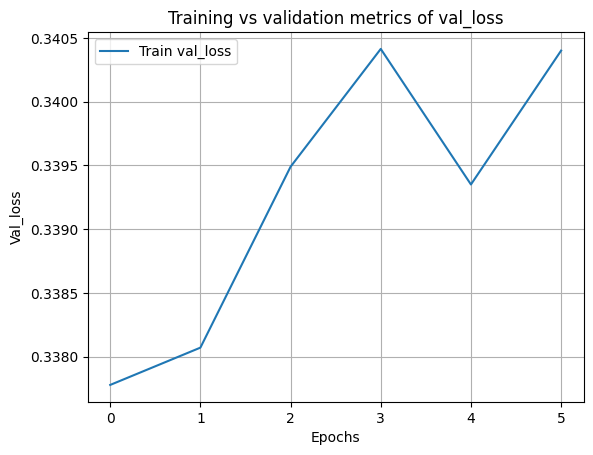

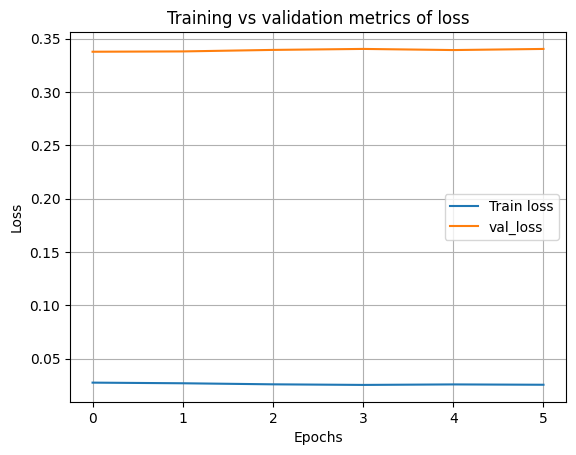

In [206]:
history_2.history.keys()

history_2.history['val_loss']

plot_history(history=history_2,metrics=['val_loss','loss'])


In [283]:
n_features=X_train[num_cols].shape[1]
from tensorflow.keras import Input, layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Input, Dense
import tensorflow as tf

tf.random.set_seed(42)
n_features = X_train_prep.shape[1]

model_2 = tf.keras.Sequential([
    Input(shape=(n_features,)),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1)
])
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='mae',    
    metrics=['mae']
)

In [284]:
# our model is overfitting so to avoid overfitting we will use the techniques likes early stopping, regularization,

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_3 = model_2.fit(
    X_train_prep, y_train,
    validation_data=(x_val_prep, y_val),
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.3514 - mae: 0.7416 - val_loss: 1.2326 - val_mae: 0.6788
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2265 - mae: 0.7146 - val_loss: 1.1271 - val_mae: 0.6557
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1173 - mae: 0.6780 - val_loss: 1.0331 - val_mae: 0.6252
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0304 - mae: 0.6479 - val_loss: 0.9494 - val_mae: 0.5920
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9279 - mae: 0.5907 - val_loss: 0.8702 - val_mae: 0.5527
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8483 - mae: 0.5470 - val_loss: 0.7970 - val_mae: 0.5119
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7787 - mae: 0.5071 - val_loss: 0.7331 - val_mae: 0.4751
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7172 - mae: 0.4708 - val_loss: 0.6855 - val_mae: 0.4505
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.67

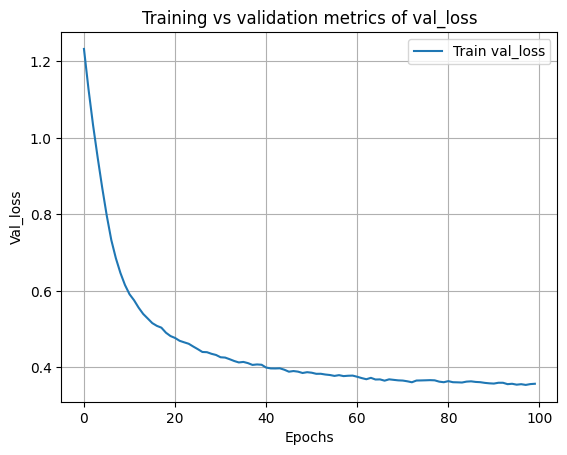

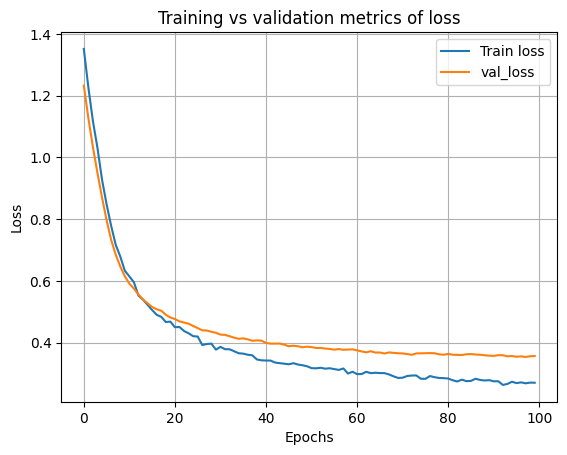

In [285]:
plot_history(history=history_3,metrics=['val_loss','loss'])

In [346]:
n_features=X_train[num_cols].shape[1]
from tensorflow.keras import Input, layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Input, Dense
import tensorflow as tf

tf.random.set_seed(42)
n_features = X_train_prep.shape[1]

model_4 = tf.keras.Sequential([
    Input(shape=(n_features,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(1)
])
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='mae',    
    metrics=['mae']
)

In [347]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-5
)
history_4 = model_4.fit(
    X_train_prep, y_train,
    validation_data=(x_val_prep, y_val),
    epochs=100,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6294 - mae: 0.5474 - val_loss: 0.4873 - val_mae: 0.4166 - learning_rate: 0.0050
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4599 - mae: 0.3880 - val_loss: 0.4586 - val_mae: 0.3861 - learning_rate: 0.0050
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4050 - mae: 0.3319 - val_loss: 0.4409 - val_mae: 0.3666 - learning_rate: 0.0050
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3887 - mae: 0.3149 - val_loss: 0.4328 - val_mae: 0.3572 - learning_rate: 0.0050
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3761 - mae: 0.2986 - val_loss: 0.4284 - val_mae: 0.3488 - learning_rate: 0.0050
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3660 - mae: 0.2868 - val_loss: 0.4097 - val_mae: 0.3302 - learning_rate: 0.0050
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3541 - mae: 0.2733 - val_loss: 0.4083 - val_mae: 0.3265 - learning_rate: 0.0050
Epoch 8/100


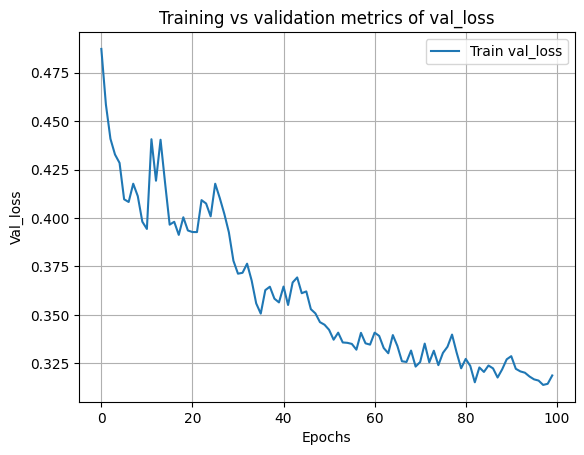

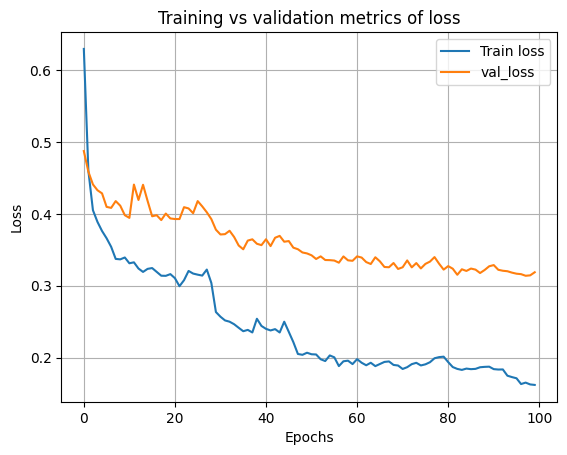

In [348]:
plot_history(history=history_4,metrics=['val_loss','loss'])

In [354]:
tf.random.set_seed(42)
n_features = X_train_prep.shape[1]

tf.random.set_seed(42)
n_features = X_train_prep.shape[1]

# Model with smoother learning
model_5 = tf.keras.Sequential([
    # Input(shape=(n_features,)),
     Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(n_features,)),
    Dropout(0.4),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    Dense(1)
])
# model = tf.keras.Sequential([
#     Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(n_features,)),
#     Dropout(0.4),
#     Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
#     Dropout(0.3),
#     Dense(1)
# ])

model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mae',
    metrics=['mae']
)

In [355]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        
    patience=5,      
    min_lr=1e-5,
    verbose=1
)

In [356]:
history_5 = model.fit(
    X_train_prep, y_train,
    validation_data=(x_val_prep, y_val),
    epochs=200,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0433 - mae: 0.0433 - val_loss: 0.3261 - val_mae: 0.3261 - learning_rate: 1.2500e-05
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mae: 0.0407 - val_loss: 0.3264 - val_mae: 0.3264 - learning_rate: 1.2500e-05
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mae: 0.0393 - val_loss: 0.3266 - val_mae: 0.3266 - learning_rate: 1.2500e-05
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0384 - mae: 0.0384 - val_loss: 0.3266 - val_mae: 0.3266 - learning_rate: 1.2500e-05
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 - mae: 0.0375 - val_loss: 0.3266 - val_mae: 0.3266 - learning_rate: 1.2500e-05
Epoch 6/200
41/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0387 - mae: 0.0387
Epoch 6: ReduceLROnPlateau reducing learning rate to 1e-05.
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0370 - mae: 0.0370 - val_loss: 0.3267 - val_mae: 0.3267 - learning_rate: 1.2500e-05
Ep

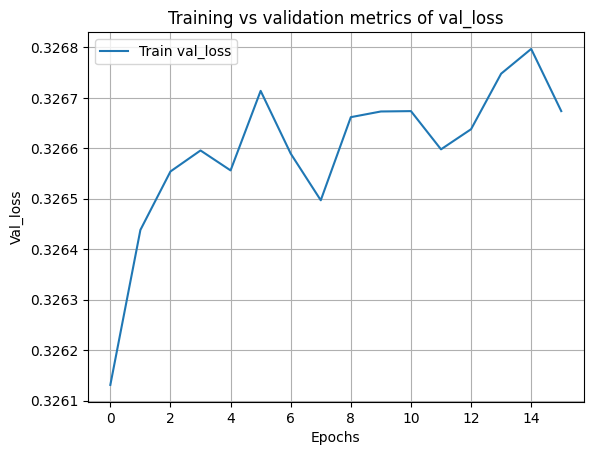

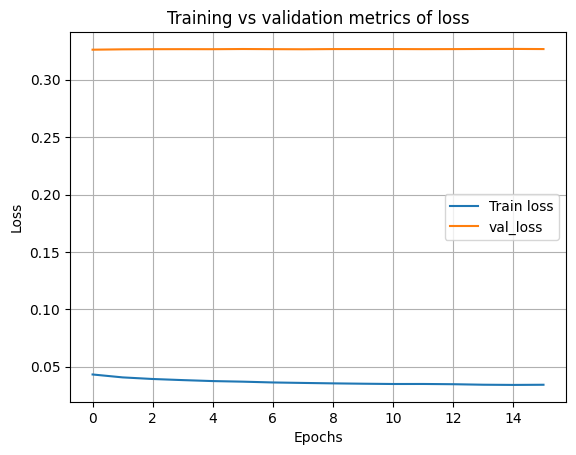

In [357]:
plot_history(history=history_5,metrics=['val_loss','loss'])